# 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [50]:
df = pd.read_csv('2016_movie_reviews.txt', delimiter='\t\t', engine='python', header=None, encoding='UTF-8')
df.columns = ['id', 'document', 'score']

In [51]:
df.head()

,id,document,score
0,140693,아니 딴건 그렇다 치고 비비탄 총은 대체 왜 들고 온겨 ㅋㅋㅋ,7
1,140693,진심 이리 쓰레기를 영화라 만들다니 무서울줄알고 쫄아서 틀었는데 이건 뭐 웃을거리도...,1
2,140693,역대 좀비영화중 가장 최고다.. 원작만화 읽어보려다 영화 보고 결정하려... 감독이...,10
3,140693,온종일 불편한 피범벅일뿐,6
4,140693,답답함의 극치. 움직일수 잇으면 좀 움직여라 어지간히 좀비 봣으면 그만 얼타고 때려...,1


In [53]:
print(len(df))

788189


# 2. 데이터 클리닝

## 2.1 중립적인 리뷰 삭제 
- 5~7점 리뷰 삭제

In [54]:
df['score'].value_counts().sort_index(ascending=True)

1      58295
2       9853
3      10696
4      11548
5      26008
6      32730
7      56845
8     112648
9     117921
10    351645
Name: score, dtype: int64

In [55]:
df.drop(df[df['score'] == 5].index, inplace=True)

In [56]:
df.drop(df[df['score'] == 6].index, inplace=True)

In [57]:
df.drop(df[df['score'] == 7].index, inplace=True)

In [58]:
df['score'].value_counts().sort_index(ascending=True)

1      58295
2       9853
3      10696
4      11548
8     112648
9     117921
10    351645
Name: score, dtype: int64

In [59]:
print(len(df))

672606


## 2.2 Null 값 포함하는 행 제거

In [61]:
df['document'].isna().sum()

3

In [63]:
df = df.dropna(axis=0)

In [64]:
df['document'].isna().sum()

0

In [65]:
print(len(df))

672603


## 2.3 평점 기준으로 문서에 0 또는 1의 label 추가
- 1 ~ 4 : 부정 0
- 8 ~ 10 : 긍정 1

In [79]:
def convert_label(x):
    if x >= 8:
        return 1
    else:
        return 0
df['label'] = df['score'].apply(convert_label)

In [85]:
df['label'].value_counts().sort_index(ascending=True)

0     90390
1    582213
Name: label, dtype: int64

In [96]:
df.head()

,id,document,score,label
1,140693,진심 이리 쓰레기를 영화라 만들다니 무서울줄알고 쫄아서 틀었는데 이건 뭐 웃을거리도...,1,0
2,140693,역대 좀비영화중 가장 최고다.. 원작만화 읽어보려다 영화 보고 결정하려... 감독이...,10,1
4,140693,답답함의 극치. 움직일수 잇으면 좀 움직여라 어지간히 좀비 봣으면 그만 얼타고 때려...,1,0
7,140693,"좀비 캐릭터만큼은 역대급인 듯.. 가히 일본스러웠고, 특히 높이뛰기 좀비는 대박이었...",8,1
9,140693,아무리 좀비영화라지만 너무 아무 내용도 없자나,3,0


## 2.4 리뷰 텍스트에 존재하는 문자가 아닌 숫자 제거
- 문자가 아닌 숫자의 경우 단어적인 의미가 부족하므로 

In [111]:
import re

df['document'] = df['document'].apply(lambda x: re.sub(r"\d+", "", x))

## 2.5 특수문자 제거

In [112]:
df['document'] = df['document'].apply(lambda x: re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', "", x))

In [117]:
df['document']

1         진심 이리 쓰레기를 영화라 만들다니 무서울줄알고 쫄아서 틀었는데 이건 뭐 웃을거리도...
2         역대 좀비영화중 가장 최고다 원작만화 읽어보려다 영화 보고 결정하려 감독이 간츠실사...
4         답답함의 극치 움직일수 잇으면 좀 움직여라 어지간히 좀비 봣으면 그만 얼타고 때려 ...
7         좀비 캐릭터만큼은 역대급인 듯 가히 일본스러웠고 특히 높이뛰기 좀비는 대박이었다 히...
9                                 아무리 좀비영화라지만 너무 아무 내용도 없자나
                                ...                        
788184                                            지금 만나러갑니다
788185                                   와 진짜 완전 재미있었다 ㅎㅎㅎㅎ
788186                   무조건  아이맥스로 보세요 영상미 말도안되네요마블이 또 일냈다
788187    아이맥스시사회다녀왔습니다 꼭 로보시는거 추천드릴께요 초반전개가 너무빠른거빼곤 괜찮네...
788188                                            최고에요베니사랑해
Name: document, Length: 672603, dtype: object

## 2.6 필요없는 칼럼 삭제
- id 칼럼
- score

In [119]:
df.drop('id', axis=1, inplace=True)

In [121]:
df.drop('score', axis=1, inplace=True)

In [122]:
df.head()

,document,label
1,진심 이리 쓰레기를 영화라 만들다니 무서울줄알고 쫄아서 틀었는데 이건 뭐 웃을거리도...,0
2,역대 좀비영화중 가장 최고다 원작만화 읽어보려다 영화 보고 결정하려 감독이 간츠실사...,1
4,답답함의 극치 움직일수 잇으면 좀 움직여라 어지간히 좀비 봣으면 그만 얼타고 때려 ...,0
7,좀비 캐릭터만큼은 역대급인 듯 가히 일본스러웠고 특히 높이뛰기 좀비는 대박이었다 히...,1
9,아무리 좀비영화라지만 너무 아무 내용도 없자나,0


## 2.7 토큰화 및 불용어 제거
- 토큰화 및 불용어 제거한 tok_document를 df에 추가
- 기존의 document 원본 제거

In [125]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','을','에서','해서']

In [126]:
from konlpy.tag import Okt

okt = Okt()
print(df['document'][1])
print(okt.morphs(df['document'][1]))

진심 이리 쓰레기를 영화라 만들다니 무서울줄알고 쫄아서 틀었는데 이건 뭐 웃을거리도없는 쓰레기영화임
['진심', '이리', '쓰레기', '를', '영화', '라', '만들다니', '무서울줄', '알', '고', '쫄아', '서', '틀었는데', '이건', '뭐', '웃', '을', '거리', '도', '없는', '쓰레기', '영화', '임']


In [127]:
from tqdm import tqdm

X_df = []
for sentence in tqdm(df['document']):
    tem_X = okt.morphs(sentence) # 토큰화
    tem_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_df.append(tem_X)

100%|███████████████████████████████████████████████████████████████████████| 672603/672603 [1:01:37<00:00, 181.92it/s]


In [128]:
df['tok_document'] = X_df

In [129]:
df.head()

,document,label,tok_document
1,진심 이리 쓰레기를 영화라 만들다니 무서울줄알고 쫄아서 틀었는데 이건 뭐 웃을거리도...,0,"[진심, 이리, 쓰레기, 영화, 라, 만들다니, 무서울줄, 알, 고, 쫄아, 서, ..."
2,역대 좀비영화중 가장 최고다 원작만화 읽어보려다 영화 보고 결정하려 감독이 간츠실사...,1,"[역대, 좀비, 영화, 중, 가장, 최고다, 원작, 만화, 읽어, 보려다, 영화, ..."
4,답답함의 극치 움직일수 잇으면 좀 움직여라 어지간히 좀비 봣으면 그만 얼타고 때려 ...,0,"[답답함의, 극치, 움직일수, 잇으면, 움직여라, 어지간히, 좀비, 봣으, 면, 그..."
7,좀비 캐릭터만큼은 역대급인 듯 가히 일본스러웠고 특히 높이뛰기 좀비는 대박이었다 히...,1,"[좀비, 캐릭터, 만큼은, 역대, 급, 인, 듯, 가히, 일본, 스러웠고, 특히, ..."
9,아무리 좀비영화라지만 너무 아무 내용도 없자나,0,"[아무리, 좀비, 영화, 라지, 만, 너무, 아무, 내용, 없자나]"


In [130]:
df = df[['tok_document', 'label', 'document']]

In [131]:
df.head()

,tok_document,label,document
1,"[진심, 이리, 쓰레기, 영화, 라, 만들다니, 무서울줄, 알, 고, 쫄아, 서, ...",0,진심 이리 쓰레기를 영화라 만들다니 무서울줄알고 쫄아서 틀었는데 이건 뭐 웃을거리도...
2,"[역대, 좀비, 영화, 중, 가장, 최고다, 원작, 만화, 읽어, 보려다, 영화, ...",1,역대 좀비영화중 가장 최고다 원작만화 읽어보려다 영화 보고 결정하려 감독이 간츠실사...
4,"[답답함의, 극치, 움직일수, 잇으면, 움직여라, 어지간히, 좀비, 봣으, 면, 그...",0,답답함의 극치 움직일수 잇으면 좀 움직여라 어지간히 좀비 봣으면 그만 얼타고 때려 ...
7,"[좀비, 캐릭터, 만큼은, 역대, 급, 인, 듯, 가히, 일본, 스러웠고, 특히, ...",1,좀비 캐릭터만큼은 역대급인 듯 가히 일본스러웠고 특히 높이뛰기 좀비는 대박이었다 히...
9,"[아무리, 좀비, 영화, 라지, 만, 너무, 아무, 내용, 없자나]",0,아무리 좀비영화라지만 너무 아무 내용도 없자나


In [132]:
df.drop('document', axis=1, inplace=True)

C:\Users\gram_\anaconda3\envs\min\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [133]:
df.head()

,tok_document,label
1,"[진심, 이리, 쓰레기, 영화, 라, 만들다니, 무서울줄, 알, 고, 쫄아, 서, ...",0
2,"[역대, 좀비, 영화, 중, 가장, 최고다, 원작, 만화, 읽어, 보려다, 영화, ...",1
4,"[답답함의, 극치, 움직일수, 잇으면, 움직여라, 어지간히, 좀비, 봣으, 면, 그...",0
7,"[좀비, 캐릭터, 만큼은, 역대, 급, 인, 듯, 가히, 일본, 스러웠고, 특히, ...",1
9,"[아무리, 좀비, 영화, 라지, 만, 너무, 아무, 내용, 없자나]",0


# 3. 전처리 된 데이터 저장

In [147]:
df.to_csv('2016_movie_processed_reviews.txt', sep = '\t', index=False)

# 4. 전처리 된 데이터 불러오기

In [150]:
df_processed= pd.read_csv('2016_movie_processed_reviews.txt', delimiter='\t', engine='python', encoding='UTF-8')

In [151]:
df_processed.head()

,tok_document,label
0,"['진심', '이리', '쓰레기', '영화', '라', '만들다니', '무서울줄',...",0
1,"['역대', '좀비', '영화', '중', '가장', '최고다', '원작', '만화...",1
2,"['답답함의', '극치', '움직일수', '잇으면', '움직여라', '어지간히', ...",0
3,"['좀비', '캐릭터', '만큼은', '역대', '급', '인', '듯', '가히'...",1
4,"['아무리', '좀비', '영화', '라지', '만', '너무', '아무', '내용...",0


In [152]:
X = df_processed['tok_document']
y = df_processed['label']

# 5. 학습/평가 데이터 분리

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [154]:
X_train.iloc[0]

"['음악', '좋고', '서로', '꿈', '향', '해']"

In [155]:
y_train.iloc[0]

1

# 6. 불균형 클래스 확인
- 본인이 구축한 학습데이터에 불균형 클래스 (imbalanced class) 문제가 존재한다고 생각되는 경우, 어떻게 해결할 수 있는지를 찾아보고, 해당 방법들을 시도해 보기.
참고: https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/ 

In [156]:
y_train.value_counts()

1    407582
0     63240
Name: label, dtype: int64

In [213]:
neg, pos = np.bincount(y_train)
total = neg + pos
print('data distribution:\n    Total: {}\n    1: {} ({:.1f}% of total)\n    0: {} ({:.1f}% of total)'.format(
    total, pos, 100 * pos / total, neg, 100 * neg / total))

data distribution:
    Total: 470822
    1: 407582 (86.6% of total)
    0: 63240 (13.4% of total)


1 이 전체 데이터에서 86.6% , 0 이 전체 데이터에서 13.4 %로 불균형 클래스가 존재한다

# 7. 학습과 평가 작업 (불균형 클래스 존재)
- CountVectorizer & TfidfVectorizer
- GridSearchCV(Grid search + k-fold cross validation) 수행
- 학습 결과 (test dataset에 대한 confusion matrix를 이용하여 계산될 수 있는 지표값들 + ROC & AUC) 리포트 & 해석하기

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

## 7.1 CountVectorizer

### 7.1.1 GridSearchCv 수행

In [159]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
pipeline1 = Pipeline([
    ('Ct_vect', CountVectorizer()),
    ('lr_clf', LogisticRegression(solver='saga', max_iter = 100, n_jobs=-1))
])

params1 = {'Ct_vect__ngram_range' : [(1,1), (1,2)],
         'Ct_vect__min_df': [1, 3],
         'lr_clf__C' : [0.1, 1, 5]
}

grid_cv_pipe1 = GridSearchCV(pipeline1, param_grid=params1, cv=3, scoring='accuracy', verbose=2)
grid_cv_pipe1.fit(X_train, y_train)
print(grid_cv_pipe1.best_params_, grid_cv_pipe1.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END Ct_vect__min_df=1, Ct_vect__ngram_range=(1, 1), lr_clf__C=0.1; total time=  35.5s
[CV] END Ct_vect__min_df=1, Ct_vect__ngram_range=(1, 1), lr_clf__C=0.1; total time=  33.3s
[CV] END Ct_vect__min_df=1, Ct_vect__ngram_range=(1, 1), lr_clf__C=0.1; total time=  37.3s
[CV] END Ct_vect__min_df=1, Ct_vect__ngram_range=(1, 1), lr_clf__C=1; total time=  37.7s
[CV] END Ct_vect__min_df=1, Ct_vect__ngram_range=(1, 1), lr_clf__C=1; total time=  41.8s
[CV] END Ct_vect__min_df=1, Ct_vect__ngram_range=(1, 1), lr_clf__C=1; total time=  35.5s
[CV] END Ct_vect__min_df=1, Ct_vect__ngram_range=(1, 1), lr_clf__C=5; total time=  37.3s
[CV] END Ct_vect__min_df=1, Ct_vect__ngram_range=(1, 1), lr_clf__C=5; total time=  41.6s
[CV] END Ct_vect__min_df=1, Ct_vect__ngram_range=(1, 1), lr_clf__C=5; total time=  35.9s
[CV] END Ct_vect__min_df=1, Ct_vect__ngram_range=(1, 2), lr_clf__C=0.1; total time= 1.3min
[CV] END Ct_vect__min_df=1, Ct_vect__ngra

C:\Users\gram_\anaconda3\envs\min\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### 7.1.2 그리드서치로 구한 hyper parameter 적용해서 다양한 지표값 확인
- {'Ct_vect__min_df': 1, 'Ct_vect__ngram_range': (1, 1), 'lr_clf__C': 5} 
- 학습 결과 (test dataset에 대한 confusion matrix를 이용하여 계산될 수 있는 지표값들 + ROC & AUC) 리포트 & 해석하기

In [160]:
ct_vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1)) 
ct_train_features = ct_vectorizer.fit_transform(X_train) 
ct_test_features = ct_vectorizer.transform(X_test)

In [161]:
ct_vectorizer.vocabulary_

{'음악': 115709,
 '좋고': 134014,
 '서로': 83040,
 '솔직히': 85861,
 '시작': 89127,
 '하고': 157504,
 '자다가': 122687,
 '일어나니': 119417,
 '비행': 76355,
 '기안': 15936,
 '현실': 164182,
 '오거': 108285,
 '폭포': 155740,
 '싸우고': 92108,
 '잇엇다': 120922,
 '공감': 10374,
 '눌러라': 30126,
 '이런': 116760,
 '없네': 104944,
 '쓰레기': 93700,
 '같은': 6182,
 '장면': 125785,
 '내용': 26273,
 '집합': 141143,
 '영화': 107859,
 '갈등': 4064,
 '이유': 118317,
 '확실했고': 165305,
 '스토리': 87816,
 '괜찮다': 10974,
 '그리고': 14062,
 '제일': 132103,
 '좋은': 135101,
 '영웅': 107794,
 '많이': 52169,
 '나왔다는거': 22978,
 '런던': 48322,
 '일어난': 119462,
 '테러': 152358,
 '잔악': 123681,
 '느낄수': 30789,
 '있었지만': 121996,
 '수없이': 86215,
 '많은': 52074,
 '테러리스트': 152359,
 '잠입': 125185,
 '있었는지': 121829,
 '영국': 107712,
 '보안': 69469,
 '시스템': 88891,
 '의문': 115910,
 '갑니다': 4859,
 '재미': 126097,
 '감동': 4382,
 '모두': 56592,
 '특이하고': 153356,
 '재미있게': 126482,
 '봤음': 72382,
 '관객수': 10673,
 '적은지': 130491,
 '이해': 118580,
 '안됨': 97644,
 '시간': 88568,
 '가는줄': 1912,
 '모르고': 56774,
 '한국': 159326,
 '좀비': 1336

In [162]:
lr_clf1 = LogisticRegression(C=5, max_iter = 100, solver='saga', n_jobs=-1)

In [163]:
lr_clf1.fit(ct_train_features, y_train)

C:\Users\gram_\anaconda3\envs\min\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=5, n_jobs=-1, solver='saga')

In [164]:
pred_labels1 = lr_clf1.predict(ct_test_features)

In [165]:
from sklearn.metrics import accuracy_score
print('Misclassified samples: {} out of {}'.format((pred_labels1 != y_test).sum(),len(y_test)))
print('Accuracy: %.2f' % accuracy_score(y_test, pred_labels1))

Misclassified samples: 14809 out of 201781
Accuracy: 0.93


In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_labels1)

array([[ 14914,  12236],
       [  2573, 172058]], dtype=int64)

In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_labels1))

              precision    recall  f1-score   support

           0       0.85      0.55      0.67     27150
           1       0.93      0.99      0.96    174631

    accuracy                           0.93    201781
   macro avg       0.89      0.77      0.81    201781
weighted avg       0.92      0.93      0.92    201781



In [168]:
y_prob1 = lr_clf1.predict_proba(ct_test_features)

In [169]:
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, y_prob1[:,1])

print(auc_score1)

0.9425984832443275


In [170]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, y_prob1[:,1], pos_label=1)

random_probs1 = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs1, pos_label=1)

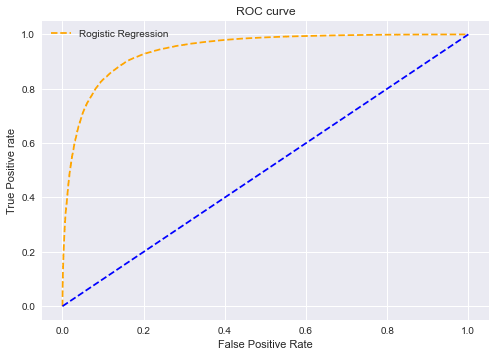

In [171]:
plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Rogistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

### 7.1.3 상위 긍정 단어 50개 출력
- 이를 위해서 학습 결과로 도출된 파라미터의 값을 기준으로 정렬하여 파라미터의 값이 큰 순으로 50개의 단어들을 출력하면 됨

In [172]:
vocablist = [word for word, _ in sorted(ct_vectorizer.vocabulary_.items(), key=lambda x:x[1])]
coefficients = lr_clf1.coef_.tolist()
sorted_coefficients = sorted(enumerate(coefficients[0]), key=lambda x:x[1], reverse=True)
print(sorted_coefficients[:5])

[(128297, 2.9832988639916813), (19242, 2.810878405649801), (128092, 2.6441695180572182), (126903, 2.614948680112752), (126749, 2.3564380244053456)]


In [173]:
print('\n긍정적인 단어 Top 50 :')
print('----------------------------')
for word, coef in sorted_coefficients[:50]:
    print('{0:} ({1:.3f})'.format(vocablist[word], coef))


긍정적인 단어 Top 50 :
----------------------------
재밌었어요 (2.983)
꿀잼 (2.811)
재밌어요 (2.644)
재미있었어요 (2.615)
재미있어요 (2.356)
좋았어요 (2.345)
재밌었음 (2.184)
재밌네요 (2.157)
좋았습니다 (2.148)
좋아요 (2.113)
재미있게 (2.105)
재밌습니다 (2.074)
재미있었습니다 (2.059)
여운 (2.046)
재밌었습니다 (2.032)
재밌음 (2.004)
시키지 (1.956)
지루하지 (1.938)
재밌고 (1.927)
재밌게 (1.882)
재밌었다 (1.854)
존잼 (1.842)
봤어요 (1.840)
가는줄 (1.834)
지루할 (1.780)
재밌는데 (1.773)
강추 (1.769)
굿굿 (1.763)
최고다 (1.760)
아깝지 (1.759)
재미있네요 (1.745)
최고 (1.716)
좋았음 (1.713)
대박 (1.705)
재미있습니다 (1.677)
짱짱 (1.663)
재밌다 (1.641)
가슴 (1.638)
흥미진진 (1.631)
재밋 (1.594)
심장 (1.590)
재미있었음 (1.551)
재밋어 (1.548)
테러 (1.534)
좋았고 (1.511)
재미있고 (1.490)
개꿀잼 (1.488)
좋네요 (1.472)
수작 (1.461)
좋고 (1.450)


### 7.1.4 상위 부정 단어 50개 출력
- 이를 위해서 학습 결과로 도출된 파라미터의 값을 기준으로 정렬하여 파라미터의 값이 작은 순으로 50개의 단어들을 출력하면 됨

In [174]:
print('\n부정적인 단어 Top 50 :')
print('----------------------------')
for word, coef in reversed(sorted_coefficients[-50:]):
    print('{0:} ({1:.3f})'.format(vocablist[word], coef))


부정적인 단어 Top 50 :
----------------------------
최악 (-3.697)
노잼 (-3.095)
아깝다 (-3.073)
재미없음 (-3.018)
아까 (-2.767)
재미없어요 (-2.708)
재미없다 (-2.554)
차라리 (-2.339)
이딴 (-2.238)
지루하고 (-2.235)
아까워 (-2.206)
졸작 (-2.183)
쓰레기 (-2.159)
재미없는 (-2.110)
비추 (-2.075)
실망 (-2.014)
재미없고 (-1.982)
역사왜곡 (-1.963)
그나마 (-1.939)
엉망 (-1.929)
이하 (-1.904)
재미없어서 (-1.860)
망작 (-1.857)
지루해서 (-1.851)
억지 (-1.839)
지루했다 (-1.837)
낭비 (-1.818)
아까운 (-1.798)
유치하고 (-1.761)
지루했어요 (-1.718)
지루해요 (-1.715)
하품 (-1.713)
잤다 (-1.703)
지루하다 (-1.699)
미화 (-1.671)
불륜 (-1.662)
별로 (-1.661)
없고 (-1.659)
알바 (-1.655)
삼류 (-1.650)
지루했음 (-1.628)
안되고 (-1.616)
지루해 (-1.583)
재미없습니다 (-1.576)
그닥 (-1.558)
아깝네요 (-1.558)
아깝 (-1.534)
재미없어 (-1.532)
억지로 (-1.531)
왜곡 (-1.524)


## 7.2 TfidfVectorizer

### 7.2.1 GridSearchCv 수행

In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
pipeline2 = Pipeline([
    ('tf_vect', TfidfVectorizer()),
    ('lr_clf', LogisticRegression(solver='saga', max_iter = 100, n_jobs=-1))
])

params2 = {'tf_vect__ngram_range' : [(1,1), (1,2)],
         'tf_vect__min_df': [1, 3],
         'lr_clf__C' : [0.1, 1, 5]
}

grid_cv_pipe2 = GridSearchCV(pipeline2, param_grid=params2, cv=3, scoring='accuracy', verbose=2)
grid_cv_pipe2.fit(X_train, y_train)
print(grid_cv_pipe2.best_params_, grid_cv_pipe2.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END lr_clf__C=0.1, tf_vect__min_df=1, tf_vect__ngram_range=(1, 1); total time=  15.6s
[CV] END lr_clf__C=0.1, tf_vect__min_df=1, tf_vect__ngram_range=(1, 1); total time=  14.3s
[CV] END lr_clf__C=0.1, tf_vect__min_df=1, tf_vect__ngram_range=(1, 1); total time=  13.9s
[CV] END lr_clf__C=0.1, tf_vect__min_df=1, tf_vect__ngram_range=(1, 2); total time=  31.2s
[CV] END lr_clf__C=0.1, tf_vect__min_df=1, tf_vect__ngram_range=(1, 2); total time=  33.1s
[CV] END lr_clf__C=0.1, tf_vect__min_df=1, tf_vect__ngram_range=(1, 2); total time=  33.9s
[CV] END lr_clf__C=0.1, tf_vect__min_df=3, tf_vect__ngram_range=(1, 1); total time=  14.6s
[CV] END lr_clf__C=0.1, tf_vect__min_df=3, tf_vect__ngram_range=(1, 1); total time=  13.7s
[CV] END lr_clf__C=0.1, tf_vect__min_df=3, tf_vect__ngram_range=(1, 1); total time=  13.4s
[CV] END lr_clf__C=0.1, tf_vect__min_df=3, tf_vect__ngram_range=(1, 2); total time=  22.3s
[CV] END lr_clf__C=0.1, tf_ve

### 7.2.2 그리드서치로 구한 hyper parameter 적용해서 다양한 지표값 확인
- {'lr_clf__C': 5, 'tf_vect__min_df': 1, 'tf_vect__ngram_range': (1, 2)}
- 학습 결과 (test dataset에 대한 confusion matrix를 이용하여 계산될 수 있는 지표값들 + ROC & AUC) 리포트 & 해석하기

In [176]:
tf_vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,2)) 
tf_train_features = tf_vectorizer.fit_transform(X_train) 
tf_test_features = tf_vectorizer.transform(X_test)

In [177]:
tf_vectorizer.vocabulary_

{'음악': 1319289,
 '좋고': 1596900,
 '서로': 883832,
 '음악 좋고': 1320331,
 '좋고 서로': 1597433,
 '솔직히': 915597,
 '시작': 967372,
 '하고': 1825691,
 '자다가': 1446813,
 '일어나니': 1406357,
 '비행': 821038,
 '기안': 209262,
 '현실': 1922569,
 '오거': 1240390,
 '폭포': 1811259,
 '싸우고': 996789,
 '잇엇다': 1419616,
 '공감': 124118,
 '눌러라': 340016,
 '솔직히 시작': 916196,
 '시작 하고': 968166,
 '하고 자다가': 1829492,
 '자다가 일어나니': 1446858,
 '일어나니 비행': 1406362,
 '비행 기안': 821041,
 '기안 현실': 209281,
 '현실 오거': 1923844,
 '오거 폭포': 1240395,
 '폭포 싸우고': 1811264,
 '싸우고 잇엇다': 996870,
 '잇엇다 공감': 1419622,
 '공감 눌러라': 124251,
 '이런': 1348541,
 '없네': 1138563,
 '이런 없네': 1349605,
 '쓰레기': 1004469,
 '같은': 77112,
 '장면': 1474468,
 '내용': 296577,
 '집합': 1682471,
 '영화': 1214903,
 '쓰레기 같은': 1004507,
 '같은 장면': 78424,
 '장면 내용': 1474875,
 '내용 집합': 299576,
 '집합 쓰레기': 1682487,
 '쓰레기 영화': 1004922,
 '갈등': 43798,
 '이유': 1377750,
 '확실했고': 1938943,
 '스토리': 939581,
 '괜찮다': 138695,
 '그리고': 184096,
 '제일': 1572233,
 '좋은': 1614925,
 '영웅': 1213183,
 '많이': 558655,
 '나왔다는거': 270908,
 '

In [178]:
lr_clf2 = LogisticRegression(C=5, max_iter = 100, solver='saga', n_jobs=-1)

In [179]:
lr_clf2.fit(tf_train_features, y_train)

LogisticRegression(C=5, n_jobs=-1, solver='saga')

In [180]:
pred_labels2 = lr_clf2.predict(tf_test_features)

In [181]:
from sklearn.metrics import accuracy_score
print('Misclassified samples: {} out of {}'.format((pred_labels2 != y_test).sum(),len(y_test)))
print('Accuracy: %.2f' % accuracy_score(y_test, pred_labels2))

Misclassified samples: 12096 out of 201781
Accuracy: 0.94


In [182]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_labels2)

array([[ 18855,   8295],
       [  3801, 170830]], dtype=int64)

In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_labels2))

              precision    recall  f1-score   support

           0       0.83      0.69      0.76     27150
           1       0.95      0.98      0.97    174631

    accuracy                           0.94    201781
   macro avg       0.89      0.84      0.86    201781
weighted avg       0.94      0.94      0.94    201781



In [184]:
y_prob2 = lr_clf2.predict_proba(tf_test_features)

In [185]:
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, y_prob2[:,1])

print(auc_score1)

0.9592542150940884


In [186]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, y_prob2[:,1], pos_label=1)

random_probs2 = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs2, pos_label=1)

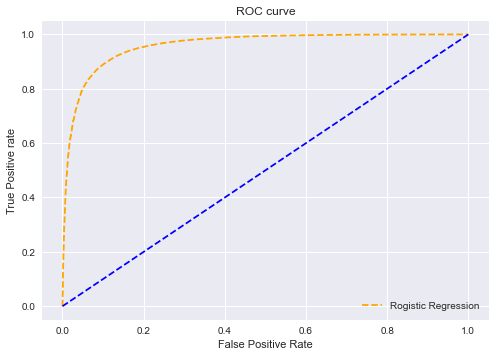

In [187]:
plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Rogistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

### 7.2.3 상위 긍정 단어 50개 출력
- 이를 위해서 학습 결과로 도출된 파라미터의 값을 기준으로 정렬하여 파라미터의 값이 큰 순으로 50개의 단어들을 출력하면 됨

In [188]:
vocablist = [word for word, _ in sorted(tf_vectorizer.vocabulary_.items(), key=lambda x:x[1])]
coefficients = lr_clf2.coef_.tolist()
sorted_coefficients = sorted(enumerate(coefficients[0]), key=lambda x:x[1], reverse=True)
print(sorted_coefficients[:5])

[(237966, 13.751482466869462), (1515540, 12.383015145021696), (1502082, 12.073101215067513), (1611982, 10.893785662662372), (1722912, 10.870762417271175)]


In [189]:
print('\n긍정적인 단어 Top 50 :')
print('----------------------------')
for word, coef in sorted_coefficients[:50]:
    print('{0:} ({1:.3f})'.format(vocablist[word], coef))


긍정적인 단어 Top 50 :
----------------------------
꿀잼 (13.751)
재밌었어요 (12.383)
재밌게 (12.073)
좋았어요 (10.894)
최고 (10.871)
재미있었어요 (10.606)
재밌어요 (10.342)
여운 (10.333)
좋았습니다 (10.312)
재미있게 (10.118)
재밌었음 (9.989)
재밌는데 (9.607)
존잼 (9.512)
가슴 (9.372)
좋아요 (9.217)
좋았음 (8.940)
재밌습니다 (8.840)
봤어요 (8.720)
재밌고 (8.711)
지루하지 (8.611)
대박 (8.468)
강추 (8.154)
아깝지 (8.102)
좋았고 (8.071)
흥미진진 (8.057)
충분히 (8.051)
재미있었습니다 (8.019)
마음 (7.934)
재밌네요 (7.931)
재미있었음 (7.923)
실망 시키지 (7.845)
약간 (7.816)
믿고 보는 (7.778)
심장 (7.760)
지루할 (7.754)
재밌음 (7.661)
사랑 (7.660)
만족 (7.630)
개꿀잼 (7.497)
짱짱 (7.496)
재밌었습니다 (7.474)
좋고 (7.462)
잼나게 (7.355)
굿굿 (7.299)
재밌었다 (7.290)
눈물 (7.245)
최고다 (7.210)
재미있네요 (7.117)
노잼 노잼 (7.096)
좋았다 (7.094)


### 7.2.4 상위 부정 단어 50개 출력
- 이를 위해서 학습 결과로 도출된 파라미터의 값을 기준으로 정렬하여 파라미터의 값이 작은 순으로 50개의 단어들을 출력하면 됨

In [190]:
print('\n부정적인 단어 Top 50 :')
print('----------------------------')
for word, coef in reversed(sorted_coefficients[-50:]):
    print('{0:} ({1:.3f})'.format(vocablist[word], coef))


부정적인 단어 Top 50 :
----------------------------
최악 (-20.154)
노잼 (-17.494)
차라리 (-13.554)
아깝다 (-13.440)
쓰레기 (-12.288)
실망 (-12.185)
알바 (-12.156)
재미없음 (-12.121)
아까 (-12.065)
졸작 (-11.835)
이딴 (-10.845)
없고 (-10.734)
재미없다 (-10.647)
그나마 (-10.604)
망작 (-10.170)
지루하고 (-9.916)
비추 (-9.909)
별로 (-9.897)
재미없고 (-9.778)
재미없어요 (-9.769)
엉망 (-9.619)
아까워 (-9.579)
하품 (-9.545)
억지 (-9.264)
재미없었다 (-9.216)
미화 (-9.172)
재미없어서 (-9.135)
불면증 (-9.127)
안되고 (-9.102)
역사왜곡 (-9.098)
잤다 (-8.742)
지루했다 (-8.653)
아까워서 (-8.557)
유치하고 (-8.510)
삼류 (-8.399)
재미없습니다 (-8.395)
불륜 (-8.348)
재미없는 (-8.282)
감독 (-8.245)
재미없었음 (-8.203)
억지로 (-8.192)
낭비 (-8.003)
자살 (-7.932)
발연기 (-7.924)
재미없네요 (-7.911)
거품 (-7.908)
수준 (-7.854)
지루해요 (-7.843)
아무리 (-7.696)
개연 (-7.679)


# 8. 학습과 평가 작업 (불균형 클래스 해결 후)
- CountVectorizer & TfidfVectorizer
- SMOTE를 이용하여 불균형 클래스 해결 
- 학습 결과 (test dataset에 대한 confusion matrix를 이용하여 계산될 수 있는 지표값들 + ROC & AUC) 리포트 & 해석하기

In [191]:
from imblearn.over_sampling import SMOTE

In [201]:
df_processed= pd.read_csv('2016_movie_processed_reviews.txt', delimiter='\t', engine='python', encoding='UTF-8')

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 8.1 CountVectorizer

In [203]:
ct_vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1)) 
ct_train_features = ct_vectorizer.fit_transform(X_train) 
ct_test_features = ct_vectorizer.transform(X_test)

In [204]:
smote = SMOTE(random_state=0)
X_train_over_ct,y_train_over_ct = smote.fit_sample(ct_train_features,y_train)

In [205]:
neg, pos = np.bincount(y_train_over)
total = neg + pos
print('data distribution:\n    Total: {}\n    1: {} ({:.1f}% of total)\n    0: {} ({:.1f}% of total)'.format(
    total, pos, 100 * pos / total, neg, 100 * neg / total))

data distribution:
    Total: 815164
    1: 407582 (50.0% of total)
    0: 407582 (50.0% of total)


In [206]:
lr_clf1 = LogisticRegression(C=5, max_iter = 100, solver='saga', n_jobs=-1)

In [210]:
lr_clf1.fit(X_train_over_ct, y_train_over_ct)

C:\Users\gram_\anaconda3\envs\min\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=5, n_jobs=-1, solver='saga')

In [211]:
pred_labels1 = lr_clf1.predict(ct_test_features)

In [212]:
print('Misclassified samples: {} out of {}'.format((pred_labels1 != y_test).sum(),len(y_test)))
print('Accuracy: %.2f' % accuracy_score(y_test, pred_labels1))

Misclassified samples: 27529 out of 201781
Accuracy: 0.86


In [214]:
confusion_matrix(y_test, pred_labels1)

array([[ 21015,   6135],
       [ 21394, 153237]], dtype=int64)

In [215]:
print(classification_report(y_test, pred_labels1))

              precision    recall  f1-score   support

           0       0.50      0.77      0.60     27150
           1       0.96      0.88      0.92    174631

    accuracy                           0.86    201781
   macro avg       0.73      0.83      0.76    201781
weighted avg       0.90      0.86      0.88    201781



In [216]:
y_prob1 = lr_clf1.predict_proba(ct_test_features)

In [217]:
auc_score1 = roc_auc_score(y_test, y_prob1[:,1])

print(auc_score1)

0.9037246125698161


In [218]:
fpr1, tpr1, thresh1 = roc_curve(y_test, y_prob1[:,1], pos_label=1)

random_probs1 = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs1, pos_label=1)

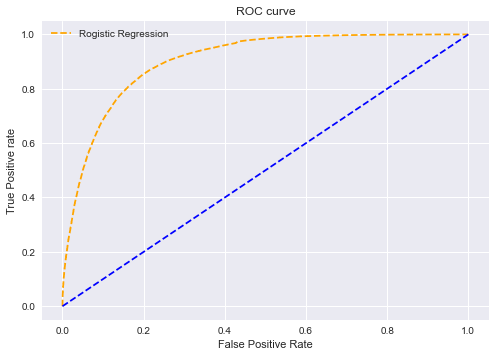

In [219]:
plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Rogistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

## 8.2 TfidfVectorizer

In [220]:
tf_vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,2)) 
tf_train_features = tf_vectorizer.fit_transform(X_train) 
tf_test_features = tf_vectorizer.transform(X_test)

In [221]:
smote = SMOTE(random_state=0)
X_train_over_tf,y_train_over_tf = smote.fit_sample(tf_train_features, y_train)

In [222]:
neg, pos = np.bincount(y_train_over_tf)
total = neg + pos
print('data distribution:\n    Total: {}\n    1: {} ({:.1f}% of total)\n    0: {} ({:.1f}% of total)'.format(
    total, pos, 100 * pos / total, neg, 100 * neg / total))

data distribution:
    Total: 815164
    1: 407582 (50.0% of total)
    0: 407582 (50.0% of total)


In [223]:
lr_clf2 = LogisticRegression(C=5, max_iter = 100, solver='saga', n_jobs=-1)

In [224]:
lr_clf2.fit(X_train_over_tf, y_train_over_tf)

LogisticRegression(C=5, n_jobs=-1, solver='saga')

In [225]:
pred_labels2 = lr_clf2.predict(tf_test_features)

In [226]:
print('Misclassified samples: {} out of {}'.format((pred_labels2 != y_test).sum(),len(y_test)))
print('Accuracy: %.2f' % accuracy_score(y_test, pred_labels2))

Misclassified samples: 16392 out of 201781
Accuracy: 0.92


In [227]:
confusion_matrix(y_test, pred_labels2)

array([[ 20073,   7077],
       [  9315, 165316]], dtype=int64)

In [228]:
print(classification_report(y_test, pred_labels2))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71     27150
           1       0.96      0.95      0.95    174631

    accuracy                           0.92    201781
   macro avg       0.82      0.84      0.83    201781
weighted avg       0.92      0.92      0.92    201781



In [229]:
y_prob2 = lr_clf2.predict_proba(tf_test_features)

In [230]:
auc_score1 = roc_auc_score(y_test, y_prob2[:,1])

print(auc_score1)

0.9413136246991854


In [231]:
fpr1, tpr1, thresh1 = roc_curve(y_test, y_prob2[:,1], pos_label=1)

random_probs2 = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs2, pos_label=1)

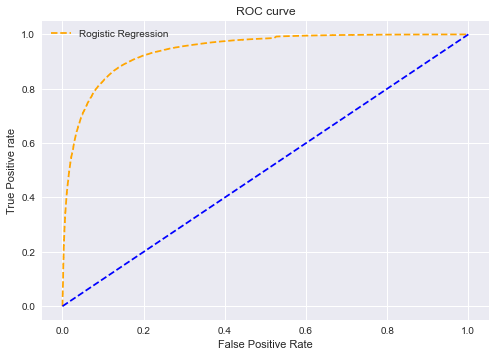

In [232]:
plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Rogistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()